<a href="https://colab.research.google.com/github/Pravalika320/Pravalika/blob/main/Copy_of_week10_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [ ]:
data.shape

(3864, 19)

In [ ]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [ ]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

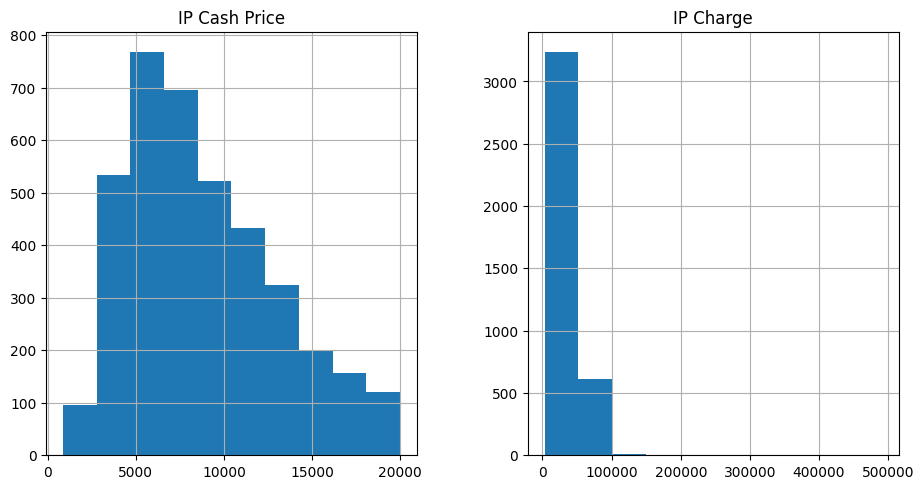

In [ ]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

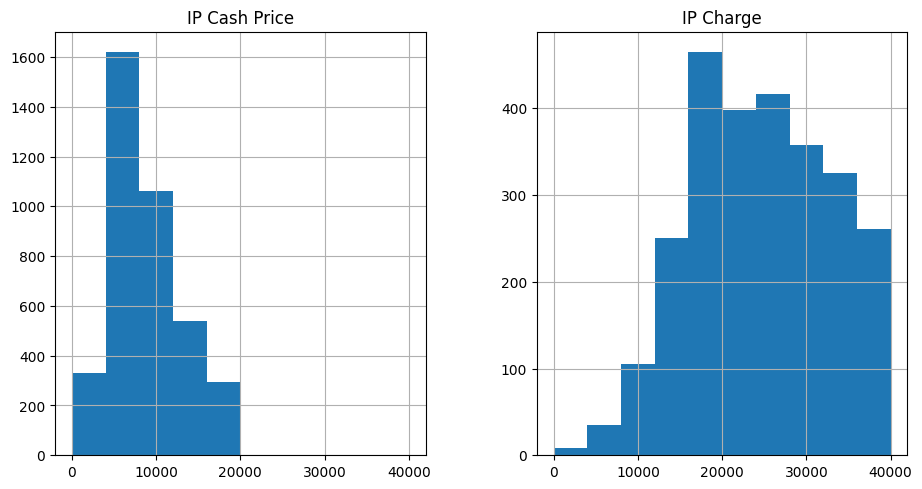

In [ ]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [ ]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:

The database includes Baptist Health Medical Center's financial and procedural data, particularly for treatments that are classified as "DRG." The procedure code, a detailed explanation of the procedure, and the related fees are all included in each item. The charge rate ("IP Charge"), anticipated reimbursement, minimum and maximum inpatient rates, cash expenses, and other relevant factors are all included in the financial data. This data seems to offer a detailed understanding of the pricing structure of the center's many medical services, increasing knowledge of the various forms of therapy and the related costs.


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

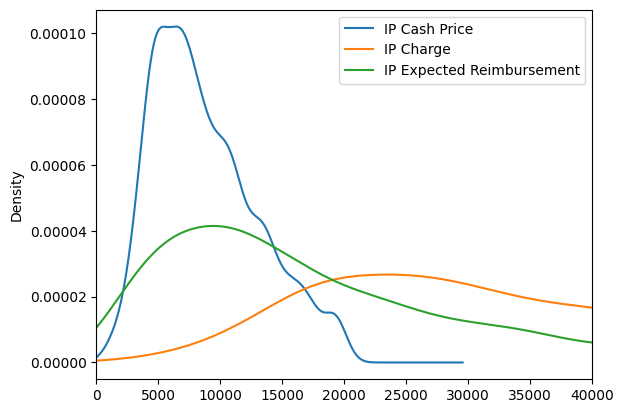

In [ ]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:

Baptist Health Medical Center's financial and procedural data is included in the database, particularly for treatments with the designation "DRG." The procedure code, a detailed description of the procedure, and the related fees are all included in each item. The charge rate ("IP Charge"), anticipated reimbursement, minimum and maximum inpatient rates, cash expenses, and other relevant factors are all included in the financial data. This data seems to offer a detailed understanding of the pricing structure of the center's many medical services, increasing knowledge of the various forms of therapy and the related costs. "IP Cash Price" : There is a distinct peak in the first histogram of the "IP Cash Price" between 5,000 and 10,000, suggesting that most services fall into this price range. As the price range increases, a steady decline, indicating the presence of less costly services. The 5,000–10,000 range remains a focus point, but when the second histogram's range is reduced to 40,000, the concentration seems to be more uniformly distributed. This range limitation reveals a greater diversity of services priced between 10,000 and 40,000 than was previously noted, indicating that the facility provides a range of services beyond the well-known lower-cost ones.

IP Charge: The first "IP Charge" histogram shows a strong concentration in the lower price classes, with a significant increase in costs over 100,000, indicating the availability of premium services. When the range is reduced to 40,000, the distribution in the second graph expands and displays the range of prices between 0 and 40,000. The distribution of the restricted range graph, which emphasizes the facility's ability to offer both standard and specialized treatments, displays a more evenly distributed cost structure.

The IP Cash Price (Blue Line) : is the amount that a person would have to pay if they didn't have insurance. The curve's sharp and early peak suggests that most treatments have cash prices in the lower range, which could make them more cost-effective for out-of-pocket spending.

IP Charge (Orange Line): The highest amount a hospital can bill an insurer is shown by this curve. The fact that its peak is wider and to the right of the IP Cash Price indicates that the range of charges given to insurance companies is usually greater than the cash price. It's possible that this is the result of hospitals increasing their charges in anticipation of having to bargain with insurance companies.

Grien Line (IP Expected Reimbursement): The sum that the hospital expects to get from an insurance company. As a result of the curve's flattening and rightward shift, predicted reimbursements are now dispersed across a larger range of values. The fact that the peak is lower than the IP Cash Price but still tends toward the lower end suggests that the hospital anticipates receiving payments from insurance companies that are more in line with the cash price rather than the frequently exaggerated IP Charge.

In conclusion, for the majority of treatments, the hospital usually bills insurance companies more than the cash outlay. On the other hand, insurance companies' real projected reimbursement is usually more in line with the cash price. Hospitals may routinely mislead their charges to insurers in order to achieve a lower actual reimbursement, or this may be the result of insurance companies' negotiating leverage, which can drive hospital rates closer to cash pricing.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [ ]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


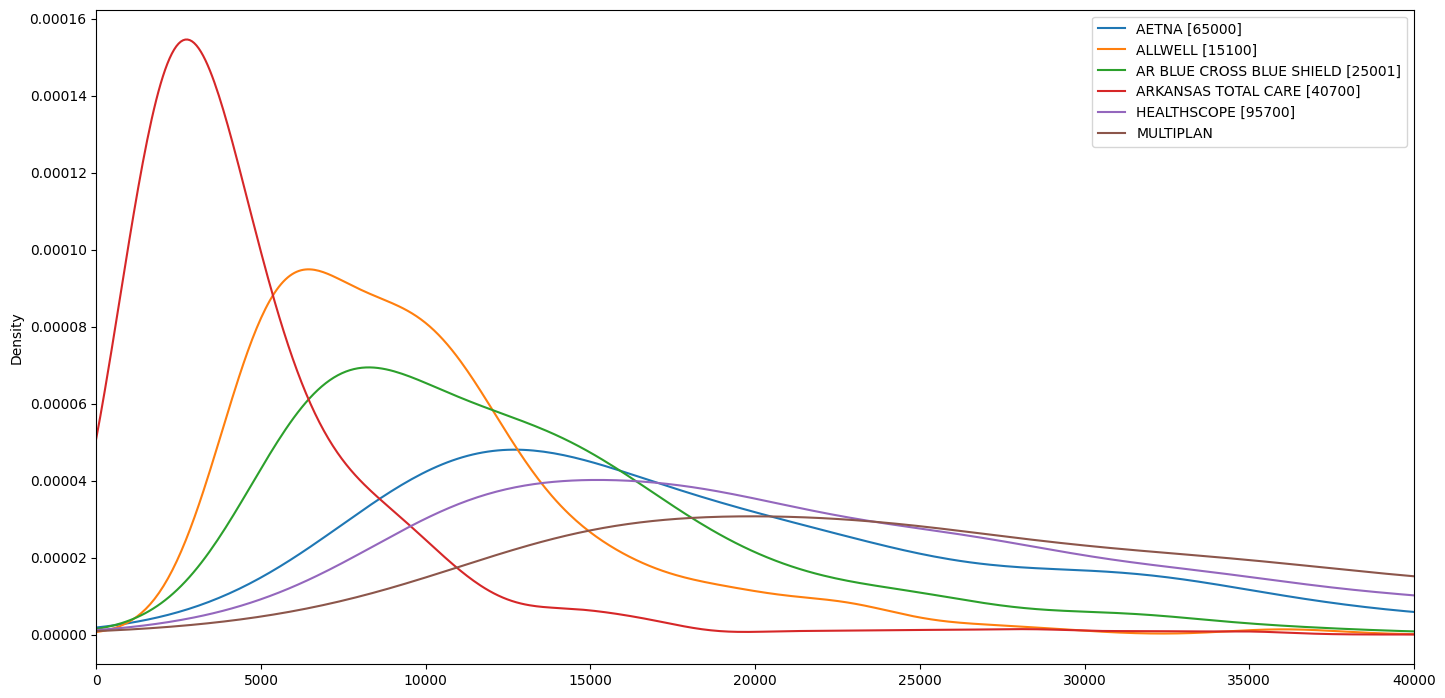

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:


AETNA [65000]: The distribution of this plan exhibits a clear peak on the far left, indicating that the majority of its services are paid for at a far lower cost than those of the other plans.

EVERYWELL [15100]: This plan's peak is situated just to the right of AETNA's. This suggests that it reimburses many services at cheaper prices even though the average reimbursement price is higher than AETNA's.
[25001] AR BLUE CROSS BLUE SHIELD: This plan indicates a greater range in reimbursement expenses because of its wider dispersion and milder slope. The peak is to the left, although not as prominent as in AETNA or ALLWELL. [40700] Total Care Arkansas. Its apex is situated somewhat to the right of the others suggests that it frequently reimburses at higher rates.

HEALTHSCOPE [95700]: With a roughly left-hand peak, the distribution of this plan is noticeably flatter, indicating a range of reimbursement prices with a focus on the lower end.

Interpretation regarding the plans: AETNA is significantly less expensive, making it an affordable option for medical expenses. ALLWELL strikes a better compromise, offering somewhat higher reimbursements than AETNA. AR BLUE CROSS BLUE SHIELD provides a wide range of reimbursement options with no specific emphasis. Arkansas Total Care reimbursements are more generous, which may result in higher rates. HEALTHSCOPE has a large distribution and provides a diverse range of services without a specific standard. MULTIPLAN, on the other hand, demonstrates adaptability by offering a diverse selection of service kinds with no dominant cost range.
The most flattened distribution of all is MULTIPLAN, which has a broad range of reimbursement prices and little concentration at any one price point.



---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

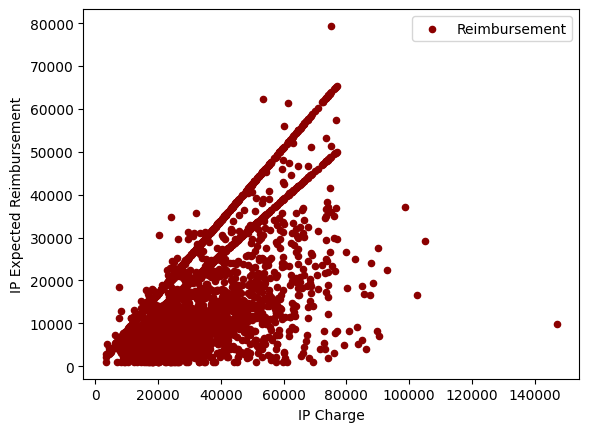

In [ ]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

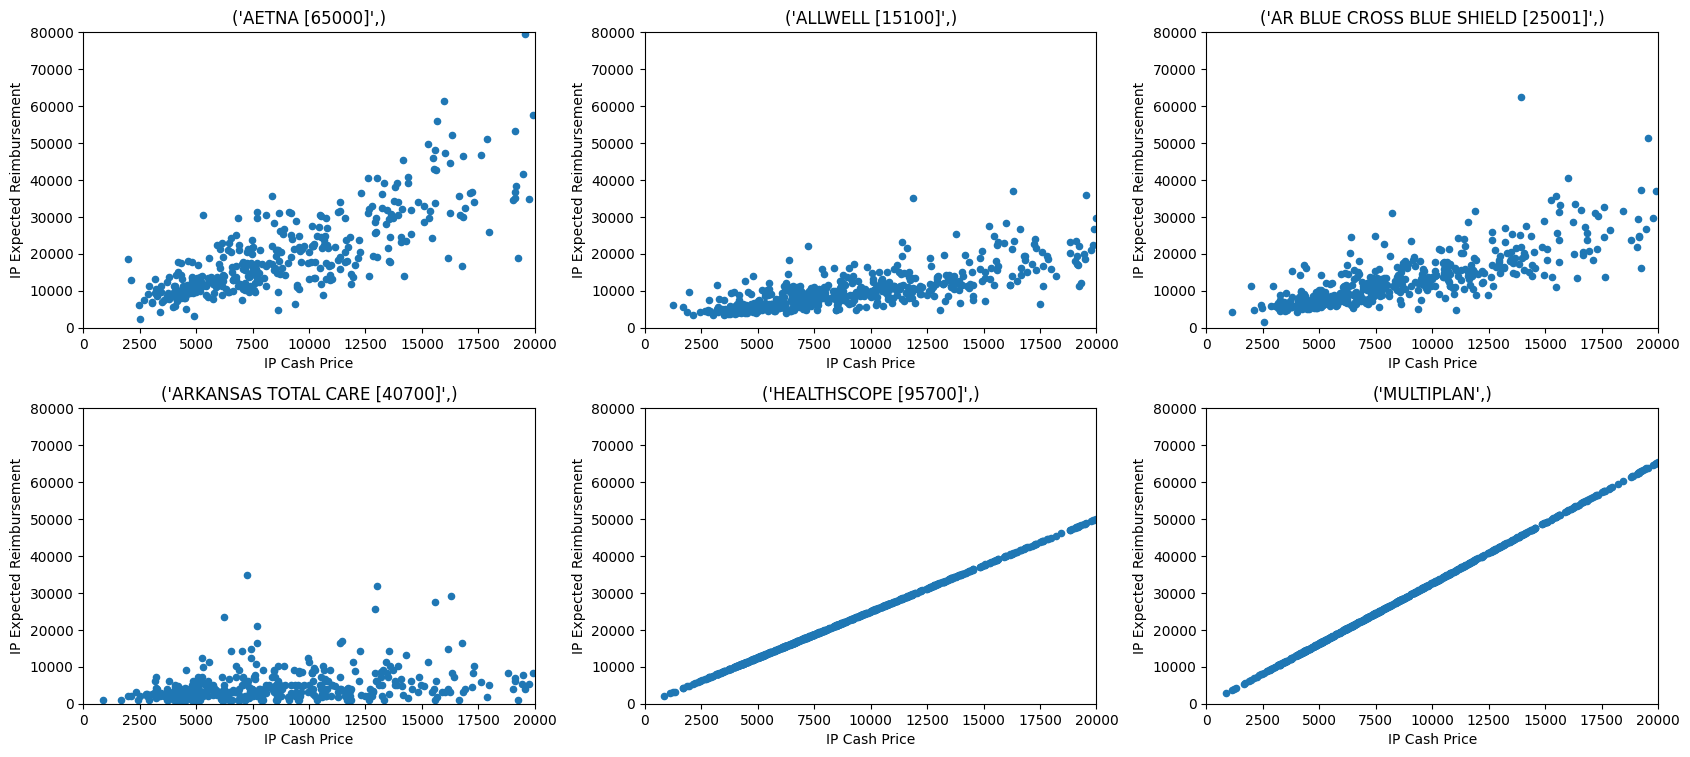

In [ ]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:

The reimbursement scatter plot for AETNA [65000] displays a collection of data points in the lower IP Cash Price and Expected Reimbursement categories. Reimbursements are inconsistent and even surprising, despite a little inclination toward a linear trend. It also suggests that AETNA occasionally offers more reimbursements, even if its primary focus is on less expensive therapies. AETNA provides a broad range of healthcare services with a diverse approach, as seen by the connection's mild linear development.

ALLWELL [15100]: For both IP Cash Price and IP Cash Price, ALLWELL's plot primarily shows data at the lower end of the spectrum. Payment is anticipated. It shows that you want to save money. Payments might not always be in line with cash pricing for services, according to a less obvious linear relationship. According to the correlation, ALLWELL is largely a cost-effective option, which appeals particularly to customers looking for less expensive services.

AR BLUE CROSS BLUE SHIELD [25001]: The scatter plot of AR BLUE CROSS BLUE SHIELD shows a variety of data.

points, with the mid-range IP Cash Price being the main focus. The discrepancy in reimbursements, regardless of service rates, indicates that there isn't a significant linear correlation. This link highlights how flexible the plan is, covering both mid-tier and low-tier services.

HEALTHSCOPE [95700]: The data points in HEALTHSCOPE's plot uniformly extend from bottom to top, demonstrating an evident linear distribution. The strong linear correlation between the IP Cash Price and the Expected Reimbursement guarantees predictability. The partnership emphasizes the notion that HEALTHSCOPE guarantees proportionate increases in payment as service charges grow, guaranteeing transparency for both insured individuals and healthcare providers. MULTIPLAN: A clear linear progression from the bottom to the top of the graph identifies the scatter plot in MULTIPLAN. This almost flawless alignment of costs and reimbursements makes MULTIPLAN a reliable data source. According to the link, patients and providers can anticipate steady reimbursement rates regardless of the service's price range, confirming MULTIPLAN as a reliable substitute for a wide range of healthcare services.


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [ ]:
# Your code here to load data...

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url="https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset" #dataset taken from kaggle
df = pd.read_csv('user_behavior_dataset.csv')
print(df.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [ ]:
df = pd.read_csv('user_behavior_dataset.csv')
print(df.columns)

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')


In [ ]:
df = pd.read_csv('user_behavior_dataset.csv')
print("columns of user_behavior_dataset")
for col in df.columns:
    print(col)

columns of user_behavior_dataset
User ID
Device Model
Operating System
App Usage Time (min/day)
Screen On Time (hours/day)
Battery Drain (mAh/day)
Number of Apps Installed
Data Usage (MB/day)
Age
Gender
User Behavior Class


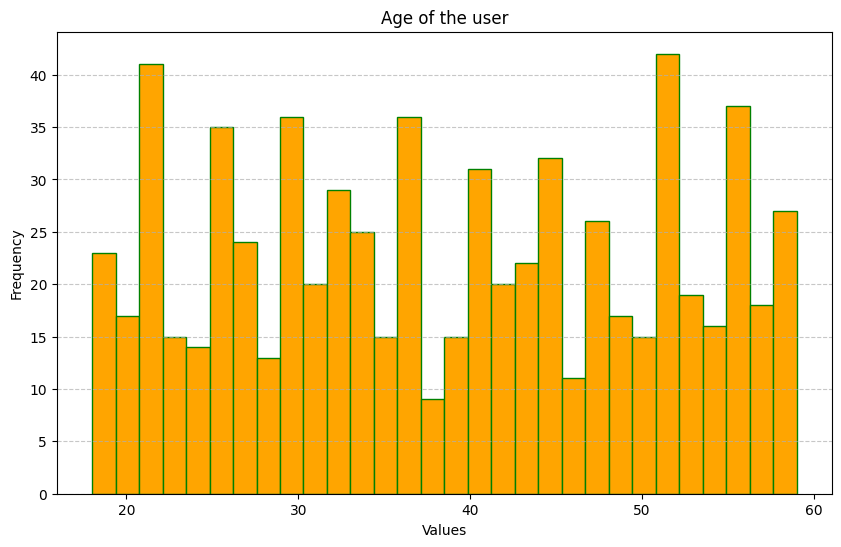

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='orange', edgecolor='Green')
plt.title('Age of the user')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Observations #1
The Age of the User histogram demonstrates that there is no prominent central peak and that the distribution is well diverse across age ranges. The frequency of users at various ages shows discernible variations. Higher frequencies indicate a greater number of users in particular age groups, such as those in their early 20s and around 50. On the other hand, lower frequencies are found in other age groups, such as the mid-40s and late-30s, suggesting that there are fewer users in those groups.

There is no dominant age group within the user population, as indicated by the histogram's generally uniform distribution with alternating high and low bars. With the exception of a few age spikes, this may indicate a varied user base with more evenly distributed representation across age groups. For focused content, marketing campaigns, or product development, this graphic offers insight into how user participation or engagement may be spread among different age groups.

<Figure size 1200x600 with 0 Axes>

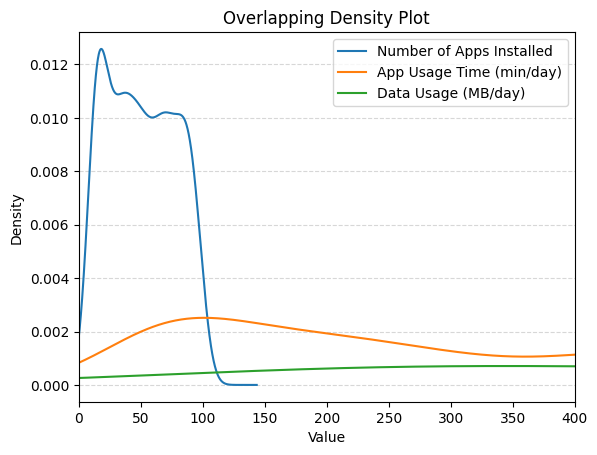

In [ ]:
# More code here to do a second visualization...
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data[['Number of Apps Installed', 'App Usage Time (min/day)', 'Data Usage (MB/day)']].plot.kde()
plt.xlim(0, 400)
plt.title('Overlapping Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(['Number of Apps Installed', 'App Usage Time (min/day)', 'Data Usage (MB/day)'])
plt.show()


### Observations #2

Number of Apps Installed, App Usage Time (min/day), and Data Usage (MB/day) all exhibit clear patterns in the density plot. Most users only have a few installed apps, as seen by the strong peak at lower values of the Number of Apps Installed curve. The density sharply declines after this peak, indicating that fewer users have more apps. A greater distribution of app usage times among users is indicated by the density curve for App Usage Time (min/day), which has a broader shape. This suggests that although most users utilize apps for a decent period of time, actual usage varies more than the number of installed apps. The density curve for Data Usage (MB/day) is flat and stays low throughout, suggesting that customers' data usage is less diverse and largely constant. Overall, the plot shows that data usage is comparatively constant throughout the dataset, app usage time is more dispersed, and the number of apps users install tends to cluster at lower numbers.

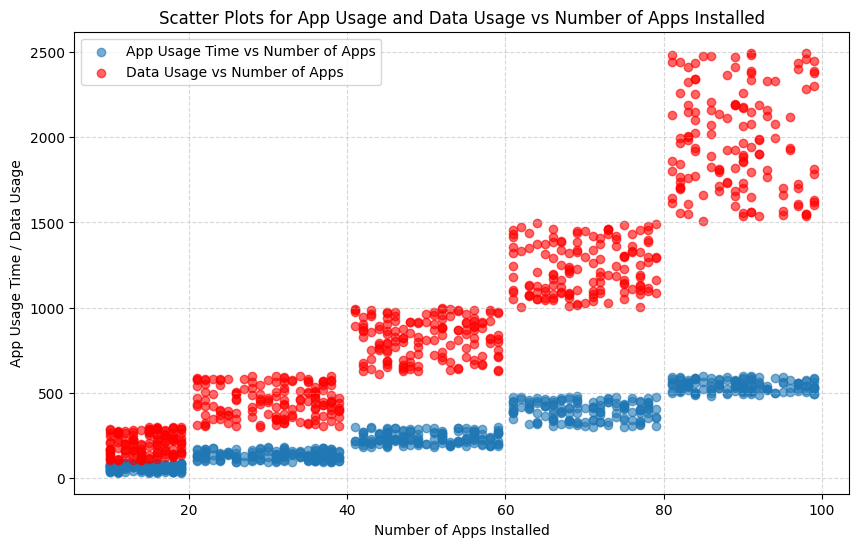

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Number of Apps Installed'], data['App Usage Time (min/day)'], alpha=0.6, label='App Usage Time vs Number of Apps')
plt.scatter(data['Number of Apps Installed'], data['Data Usage (MB/day)'], alpha=0.6, label='Data Usage vs Number of Apps', color='red')

plt.title('Scatter Plots for App Usage and Data Usage vs Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('App Usage Time / Data Usage')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

The scatter plot provides information on the correlation between Data Usage (MB/day), App Usage Time (min/day), and the Number of Installed Apps. Interestingly, users exhibit different behaviors by clustering into different groups according to the number of installed apps.

Even when the number of apps rises, app usage time stays largely stable, indicating that using more apps does not necessarily result in noticeably longer usage durations. Data usage, on the other hand, exhibits a more variable pattern and rises noticeably with the number of installed apps, particularly in the higher range (80–100 apps). This suggests that customers may use more data when they have more apps installed.

While data usage can reach up to 2500 MB per day, app usage time ranges between 600 and 700 minutes per day, indicating a wider variation in data consumption. This implies that data usage increases when more apps are installed, even though the amount of time spent on apps stays constant. High data usage outliers indicate that a portion of users are involved in data-intensive activities.

Overall, app usage duration remains constant even as data usage rises with the number of apps. This information is helpful for app development and marketing initiatives since it helps to identify user engagement and data consumption patterns.




---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option